##1. 시계열 분석


In [ ]:
!pip install -U pykrx

In [ ]:
from pykrx import stock

stock1 = stock.get_market_ticker_name("000660")
stock1

df = stock.get_market_ohlcv_by_date("20210104", "20211231", "005930")

In [ ]:
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'amount','change']
df
data=df

- 시각화

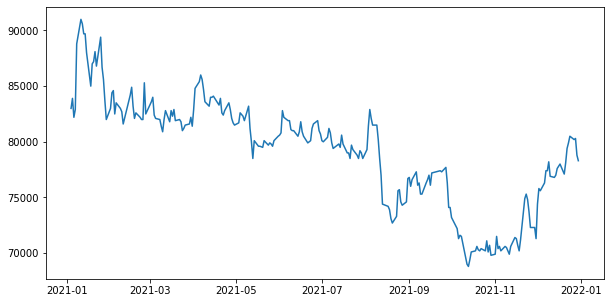

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.show()

- 정상성 체크

In [ ]:
#!pip install statsmodels
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller    #종가의 정상성 여부 점검
result=adfuller(data['Close'])
print(result) #0.5933이 p-value, 비정상 시계열

(-1.8660739163103448, 0.34818538521662656, 0, 247, {'1%': -3.457105309726321, '5%': -2.873313676101283, '10%': -2.5730443824681606}, 3830.8195835262513)


- ACF, PACF 확인

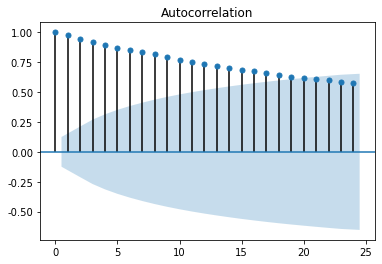

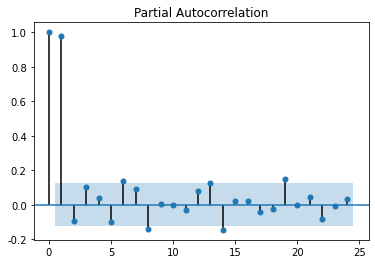

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Close']) #ACF가 느리게 감소-> 비정상시계열
plot_pacf(data['Close'])
plt.show()

- Differencing

In [ ]:
data.diff() #differencing 차이를 구해줌 ->주가가 아닌 경우에 사용

,Open,High,Low,Close,Volume,amount,change
날짜,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,600.0,-500.0,1400.0,900.0,-3319607.0,-2.697385e+11,-1.39
2021-01-06,1700.0,600.0,500.0,-1700.0,6753344.0,5.912854e+11,-3.11
2021-01-07,-500.0,-300.0,600.0,700.0,-9444371.0,-7.807912e+11,2.88
2021-01-08,500.0,5800.0,300.0,5900.0,26368665.0,2.357827e+12,6.27
...,...,...,...,...,...,...,...
2021-12-24,400.0,800.0,900.0,600.0,-1491118.0,-1.093941e+11,0.12
2021-12-27,400.0,-200.0,-400.0,-300.0,-1303012.0,-1.093348e+11,-1.12
2021-12-28,-400.0,-200.0,-100.0,100.0,7442957.0,5.938718e+11,0.49


- 로그 수익율

             Open        High         Low       Close      Volume      amount  \
count  247.000000  247.000000  247.000000  247.000000  247.000000  247.000000   
mean    -0.000106   -0.000242   -0.000107   -0.000236   -0.004044   -0.004229   
std      0.015147    0.013912    0.012226    0.013617    0.283487    0.284785   
min     -0.040052   -0.057402   -0.045330   -0.035591   -0.858579   -0.867686   
25%     -0.007996   -0.007348   -0.006969   -0.007339   -0.185996   -0.187404   
50%      0.000000    0.000000   -0.001219   -0.001234    0.002140   -0.002526   
75%      0.007371    0.006873    0.005063    0.007221    0.176373    0.180049   
max      0.077361    0.072837    0.075398    0.068752    0.833300    0.885242   

           change  
count  132.000000  
mean          NaN  
std           NaN  
min          -inf  
25%     -1.098612  
50%     -0.090569  
75%      0.693147  
max           inf  


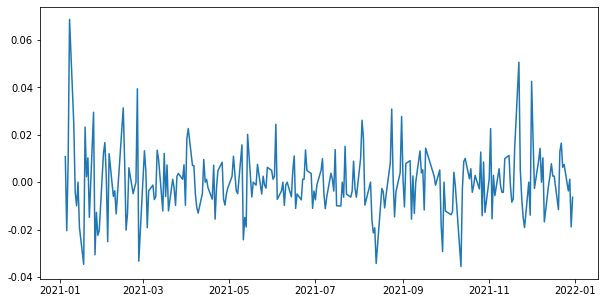

In [ ]:
import numpy as np
datapct=data.pct_change()   #주가인 경우 수익율
logreturn=np.log(1+datapct) #로그수익율
logreturn.head()
print(logreturn.describe())
plt.figure(figsize=(10,5))
plt.plot(logreturn['Close'])
plt.show()

In [ ]:
logreturn.dropna()  #NAN을 제거

,Open,High,Low,Close,Volume,amount,change
날짜,,,,,,,
2021-01-05,0.007380,-0.005942,0.017306,0.010785,-0.089790,-0.088482,-0.827257
2021-01-08,0.006020,0.066615,0.003621,0.068752,0.592082,0.623210,2.125427
2021-01-11,0.077361,0.072837,0.075398,0.024473,0.425443,0.499670,-1.054649
2021-01-13,-0.005552,-0.002191,0.014698,-0.009983,-0.299888,-0.296228,0.810930
2021-01-14,-0.012325,-0.013245,-0.004499,0.000000,-0.312294,-0.319582,-inf
...,...,...,...,...,...,...,...
2021-12-17,-0.021894,-0.006390,-0.007782,0.002567,0.088675,0.084724,0.000000
2021-12-22,0.012755,0.013951,0.016635,0.016508,0.182996,0.198340,0.244453
2021-12-23,0.011342,0.007528,0.006325,0.006277,-0.231009,-0.223506,-0.968853


- 정상성 확인

In [ ]:
from statsmodels.tsa.stattools import adfuller
logreturn=logreturn.dropna()
result=adfuller(logreturn['Close']) #p-value < 0.05
print(result)

(-9.289815856154789, 1.1881075485800211e-15, 0, 131, {'1%': -3.481281802271349, '5%': -2.883867891664528, '10%': -2.5786771965503177}, -695.3238392201392)


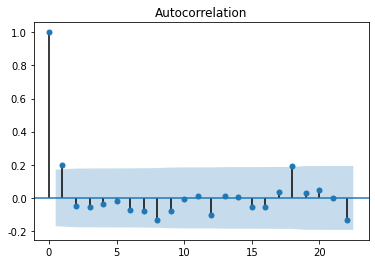

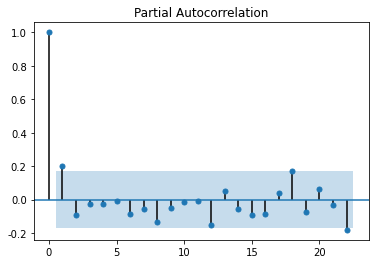

<class 'pandas.core.frame.DataFrame'>


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(logreturn['Close'])
plot_pacf(logreturn['Close']) #그림에서 절단이 일어나는 위치를 p의 값으로 지정, 24?
plt.show()
print(type(logreturn))

In [ ]:
#원래 시계열에서 q=2, 위의 그림에서 d=1
#ARIMA(0, 1, 2)
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data['Close'], order=(0,2,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1) #trend: c or nc ->constant 제거
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  246
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -2072.879
Method:                       css-mle   S.D. of innovations           1092.508
Date:                Thu, 24 Nov 2022   AIC                           4149.757
Time:                        15:54:44   BIC                           4156.768
Sample:                             2   HQIC                          4152.580
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ma.L1.D2.Close    -0.9999      0.012    -81.978      0.000      -1.024      -0.976
                                    Roots                                    
                  Real          Imaginary

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


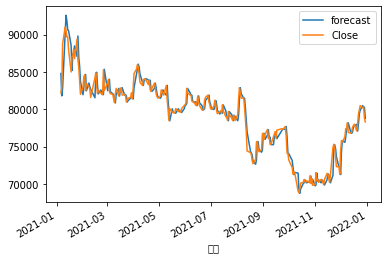

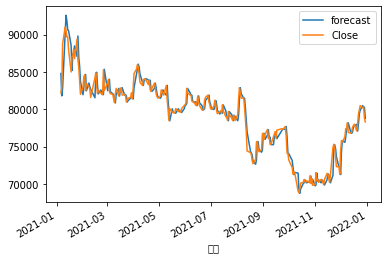

In [ ]:
model_fit.plot_predict()

In [ ]:
forecasted = model_fit.forecast(steps=1)
print(forecasted) #예측값, Standard Error, Upperbound, Lowerbound

(array([78282.89799471]), array([1092.50788547]), array([[76141.62188636, 80424.17410306]]))


- Logreturn에 대한 RNN

In [ ]:
logr1=logreturn['Close'].values
print(type(logr1))
print(logr1.shape)
logr=logr1.reshape(1,-1)
print(logr.shape)
inte=13 #pacf의 p값
x=[]
y=[]
for i in range(logr.shape[1]):
    if i+inte>logr.shape[1]-1:
        break
    else:
         xx=logr[0,i:i+inte]
         x.append(xx)
         yy=logr[0,i+inte]
         y.append(yy)
print(type(x))
print(type(y))
x=np.array(x)
y=np.array(y)
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)
x_train=x[:210]
x_test=x[210:]
y_train=y[:210]
y_test=y[210:]

<class 'numpy.ndarray'>
(132,)
(1, 132)
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(119, 13)
(119,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM
from tensorflow.keras import regularizers
model=Sequential()
model.add(Dense(1,input_shape=(inte,))) #p=13, AR(13)모형과 동일, 13개의 x변수를 갖는 셈.
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
print(loss_acc)


Epoch 1/30
4/4 [==============================] - 1s 5ms/step - loss: 4.2382e-04 - mae: 0.0162
Epoch 2/30
4/4 [==============================] - 0s 5ms/step - loss: 4.2305e-04 - mae: 0.0163
Epoch 3/30
4/4 [==============================] - 0s 6ms/step - loss: 4.1339e-04 - mae: 0.0162
Epoch 4/30
4/4 [==============================] - 0s 4ms/step - loss: 4.0975e-04 - mae: 0.0160
Epoch 5/30
4/4 [==============================] - 0s 11ms/step - loss: 4.0011e-04 - mae: 0.0157
Epoch 6/30
4/4 [==============================] - 0s 4ms/step - loss: 3.9495e-04 - mae: 0.0157
Epoch 7/30
4/4 [==============================] - 0s 4ms/step - loss: 3.9741e-04 - mae: 0.0158
Epoch 8/30
4/4 [==============================] - 0s 4ms/step - loss: 3.8879e-04 - mae: 0.0156
Epoch 9/30
4/4 [==============================] - 0s 7ms/step - loss: 3.8242e-04 - mae: 0.0155
Epoch 10/30
4/4 [==============================] - 0s 5ms/step - loss: 3.8099e-04 - mae: 0.0154
Epoch 11/30
4/4 [==============================]

## 2. Sequential Dataset
 - Feature의 길이: Sequence Length ( = Window Size)
 - 예측할 길이: STep
 - 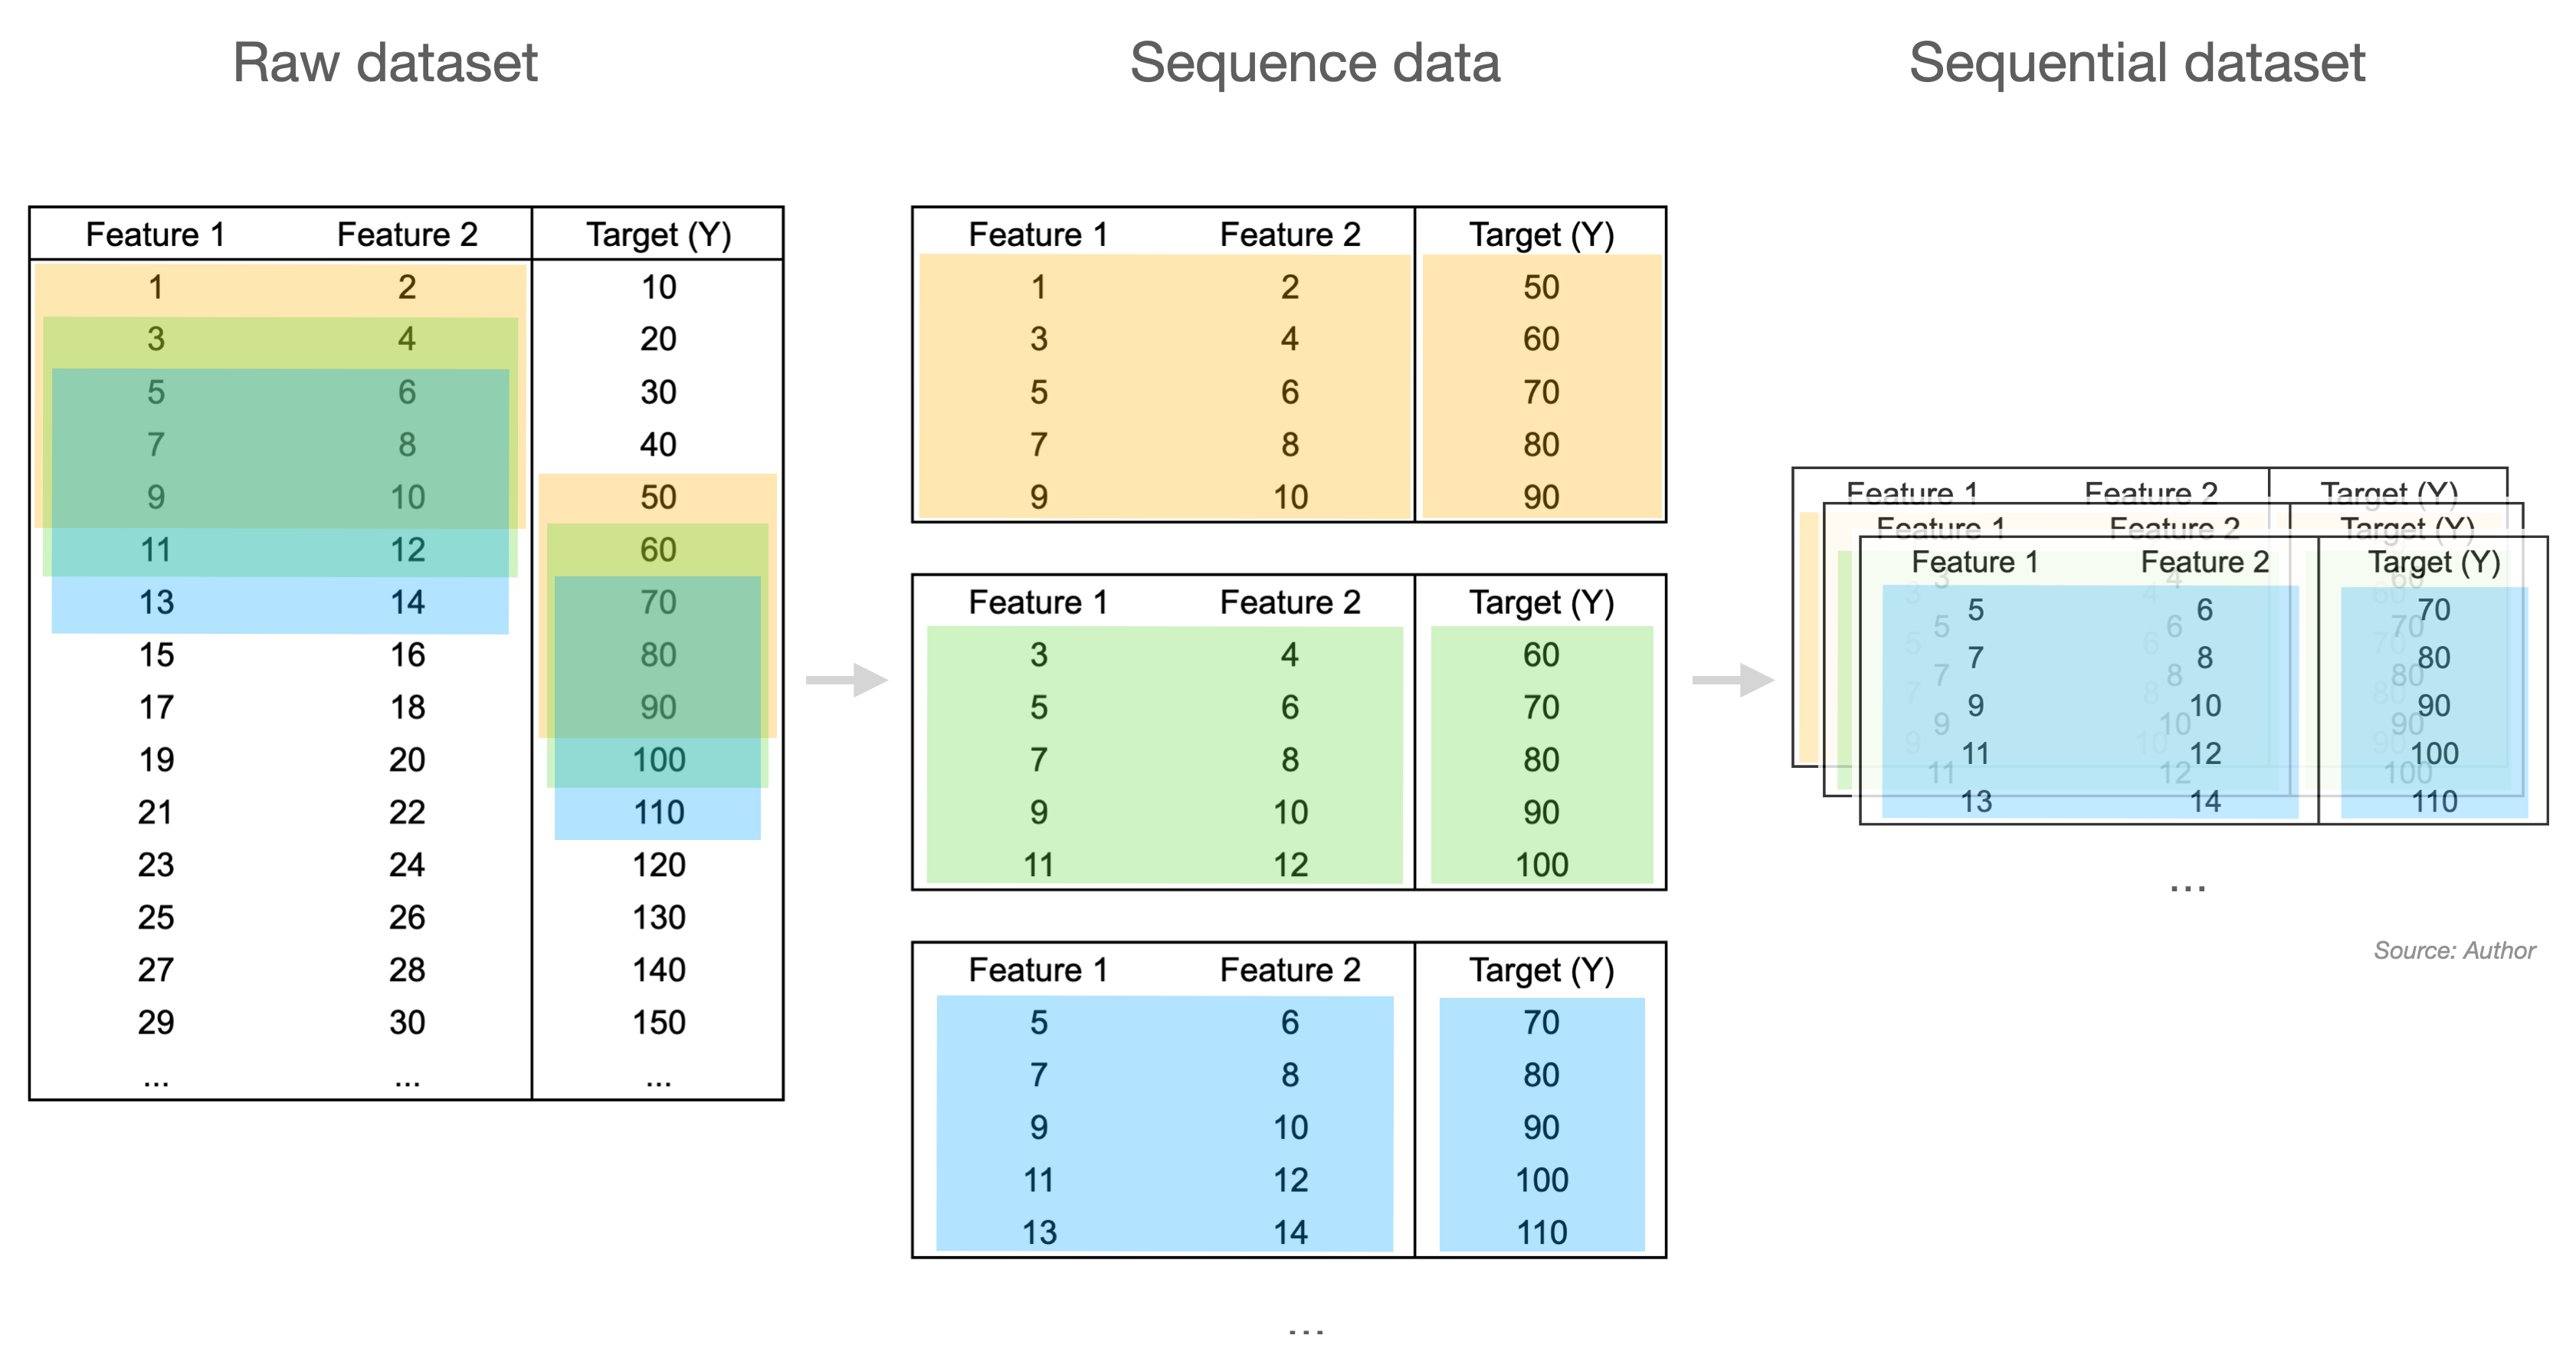

 - 예측값: 1개, step=5
 - 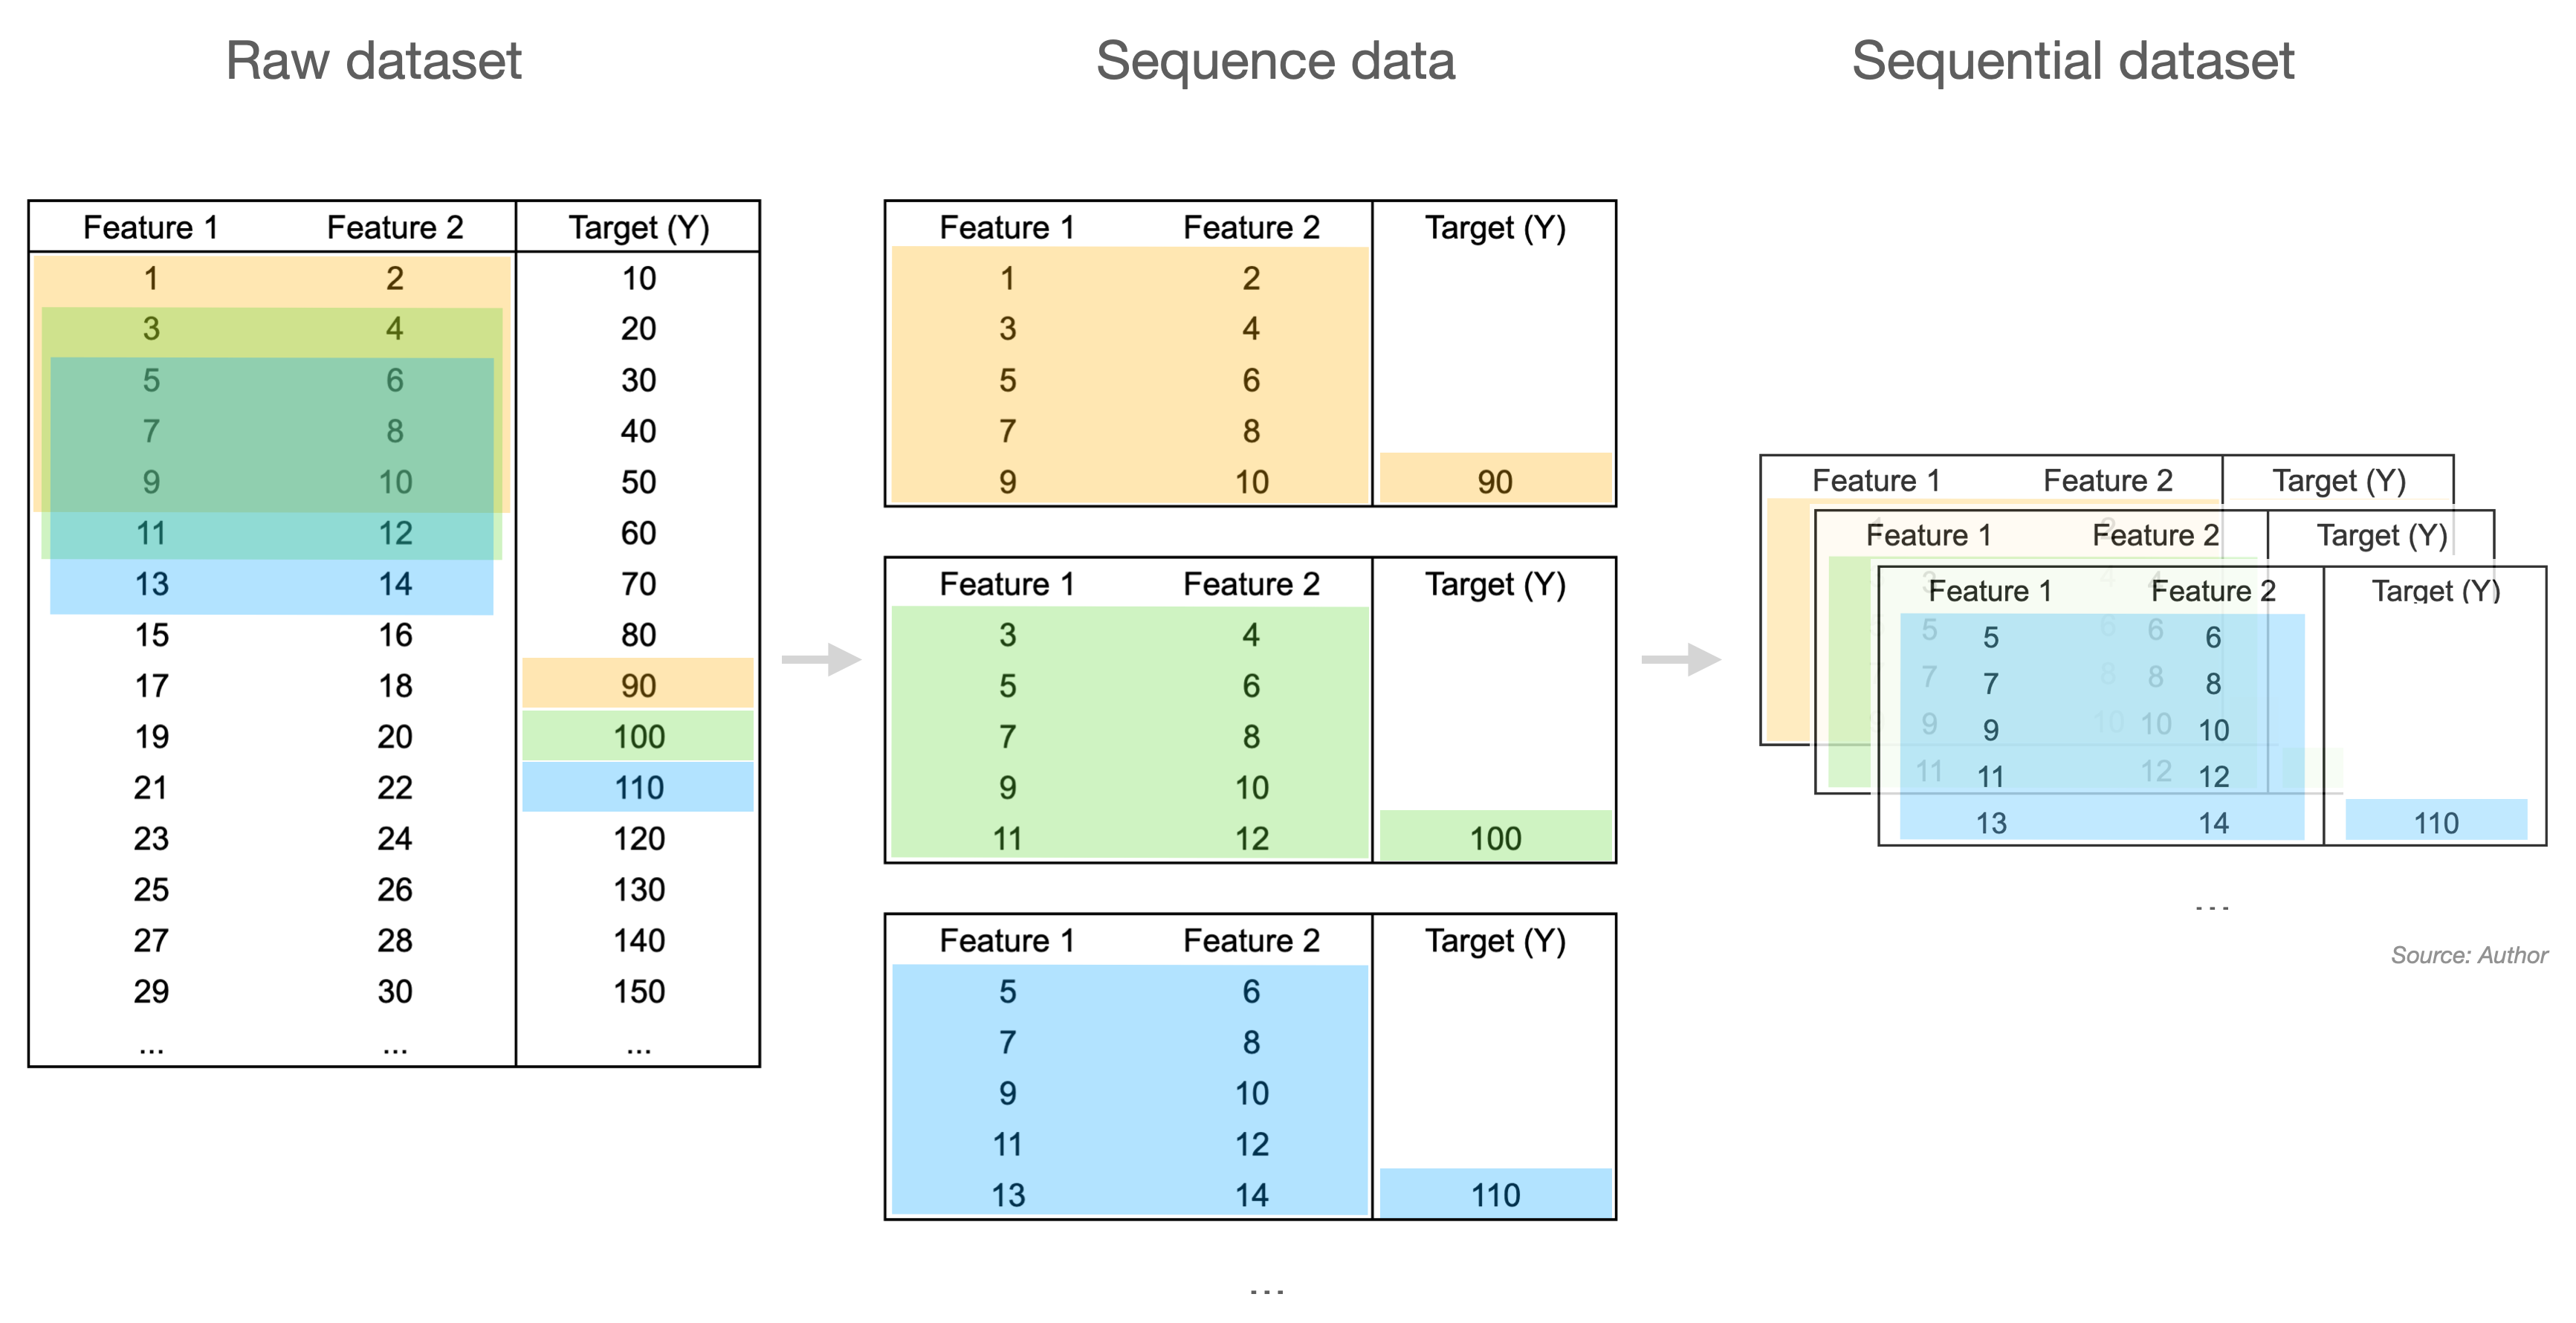

## 3. Adaboost GRU

In [ ]:
!pip install -q pybithumb
import pybithumb
mydf = pybithumb.get_ohlcv("ETH",interval='hour').reset_index()
mydf.head()


,time,open,high,low,close,volume
0,2022-04-30 01:00:00,3659000.0,3660000.0,3617000.0,3623000.0,1350.765134
1,2022-04-30 02:00:00,3623000.0,3639000.0,3604000.0,3626000.0,255.859582
2,2022-04-30 03:00:00,3627000.0,3640000.0,3613000.0,3633000.0,1321.997900
3,2022-04-30 04:00:00,3633000.0,3639000.0,3597000.0,3619000.0,1466.420341
4,2022-04-30 05:00:00,3619000.0,3640000.0,3613000.0,3626000.0,1169.602903


In [ ]:
import numpy as np
import pandas as pd
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, LSTM, InputLayer
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

Text(0.5, 1.0, 'ETH')

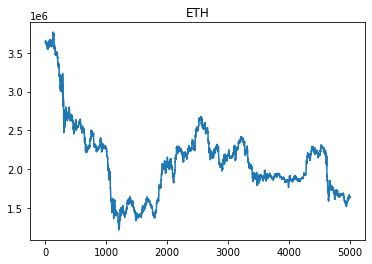

In [ ]:
plt.plot(mydf['open'])
plt.title('ETH')

Text(0.5, 1.0, 'ETH rolling with window=10')

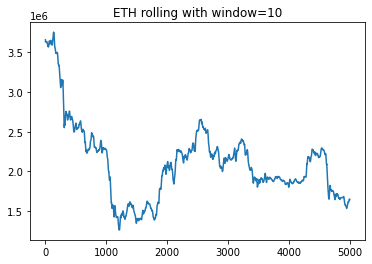

In [ ]:
rolling_10 = mydf['open'].rolling(10, min_periods=0).mean()
plt.plot(rolling_10)
plt.title('ETH rolling with window=10')

In [ ]:
def preprocess(series, window_size=None, scaling=True):

    if window_size!=None:
        series = series.rolling(window_size, min_periods=0).mean()
    array = np.array(series)

    if scaling==True:
        scaler = MinMaxScaler()
        training_data = scaler.fit_transform(array.reshape(-1,1))
    else:
        scaler = None

    return training_data, scaler

Text(0.5, 1.0, 'preprocessed training data')

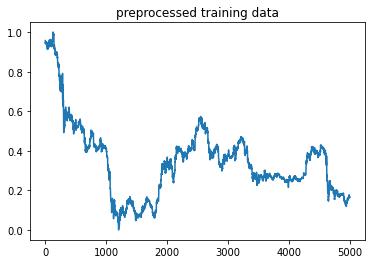

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_data = scaler.fit_transform(mydf['open'].values.reshape(-1,1))
plt.plot(training_data)
plt.title('preprocessed training data')

In [ ]:
#t개의 time step: t시점의 시계열 값들을 X변수로 사용

def make_dataset(training_data, t, h=0, test_size=0.2):

    X_train = []
    y_train = []
    for i in range(t, len(training_data)-h):
        X_train.append(training_data[i-t:i])
        y_train.append(training_data[i+h])
    X = np.array(X_train)
    y = np.array(y_train)

    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    return X_train,X_test,y_train,y_test

In [ ]:
training_data, scaler = preprocess(mydf['open'], window_size=10)

In [ ]:
X_train,X_test,y_train,y_test = make_dataset(training_data, t = 168)

- Modeling
 - LSTM, GRU, Adaboost LSTM, Adaboost GRU


In [ ]:
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true-y_pred))

def MSE(y_true, y_pred):
    return np.mean(np.square(y_true-y_pred))

def RMSE(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [ ]:
#Adaboost GRU
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],1)))
model.add(GRU(units=128))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
#KerasRegressor: sklearn의 GridSearchCV, adaboost 등에 사용하도록 제공

GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=20, batch_size=30)
final_model = AdaBoostRegressor(GRU_Predictors, n_estimators=5, random_state=42)
final_model.fit(X_train,y_train)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


129/129 [==============================] - 49s 362ms/step - loss: 0.0049
Epoch 2/20
129/129 [==============================] - 32s 251ms/step - loss: 0.0015
Epoch 3/20
129/129 [==============================] - 23s 177ms/step - loss: 0.0012
Epoch 4/20
129/129 [==============================] - 23s 177ms/step - loss: 0.0012
Epoch 5/20
129/129 [==============================] - 22s 170ms/step - loss: 0.0010
Epoch 6/20
129/129 [==============================] - 23s 176ms/step - loss: 9.5352e-04
Epoch 7/20
129/129 [==============================] - 21s 164ms/step - loss: 8.5824e-04
Epoch 8/20
129/129 [==============================] - 21s 165ms/step - loss: 8.1318e-04
Epoch 9/20
129/129 [==============================] - 24s 188ms/step - loss: 7.3348e-04
Epoch 10/20
129/129 [==============================] - 21s 165ms/step - loss: 6.6490e-04
Epoch 11/20
129/129 [==============================] - 21s 166ms/step - loss: 5.7707e-04
Epoch 12/20
129/129 [==============================] - 21s 16

AdaBoostRegressor(base_estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f045f7a7110>,
                  n_estimators=5, random_state=42)

In [ ]:
preds = final_model.predict(X_test)
preds = scaler.inverse_transform(preds.reshape(-1,1))
preds_series = np.hstack([mydf['open'][:-len(preds)], preds.squeeze(1)])



33/33 [==============================] - 2s 55ms/step


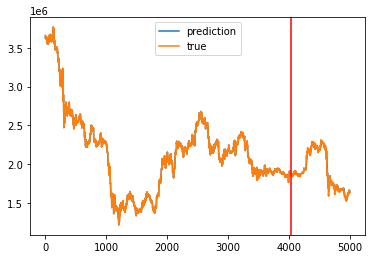

In [ ]:
plt.plot(preds_series, label='prediction')
plt.plot(mydf['open'], label='true')
plt.axvline(x=len(mydf['open'])-len(preds), color='r')
plt.legend()
plt.show()

In [ ]:
y_true = mydf['open'][-len(preds):]
y_pred = preds.squeeze(1)
print(MAE(y_true, y_pred))
print(MSE(y_true, y_pred))
print(RMSE(y_true, y_pred))

17765.03968459152
794639706.0840065
28189.354481506074


- adaboost LSTM

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=128))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
LSTM_Predictors = KerasRegressor(build_fn=lambda:model, epochs=20, batch_size=30)
final_model = AdaBoostRegressor(LSTM_Predictors, n_estimators=5, random_state=42)
final_model.fit(X_train,y_train)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


129/129 [==============================] - 29s 207ms/step - loss: 0.0074
Epoch 2/20
129/129 [==============================] - 25s 196ms/step - loss: 0.0018
Epoch 3/20
129/129 [==============================] - 26s 198ms/step - loss: 0.0014
Epoch 4/20
129/129 [==============================] - 25s 194ms/step - loss: 0.0014
Epoch 5/20
129/129 [==============================] - 25s 193ms/step - loss: 0.0012
Epoch 6/20
129/129 [==============================] - 25s 194ms/step - loss: 0.0011
Epoch 7/20
129/129 [==============================] - 26s 200ms/step - loss: 0.0010
Epoch 8/20
129/129 [==============================] - 25s 194ms/step - loss: 8.7343e-04
Epoch 9/20
129/129 [==============================] - 28s 216ms/step - loss: 8.6490e-04
Epoch 10/20
129/129 [==============================] - 26s 202ms/step - loss: 8.4388e-04
Epoch 11/20
129/129 [==============================] - 25s 194ms/step - loss: 7.0745e-04
Epoch 12/20
129/129 [==============================] - 25s 197ms/step

AdaBoostRegressor(base_estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f045a11e110>,
                  n_estimators=5, random_state=42)

33/33 [==============================] - 2s 72ms/step


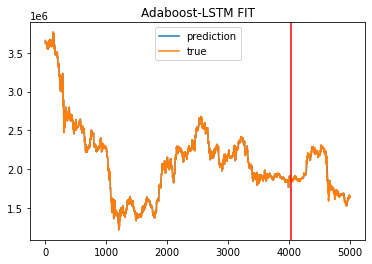

In [ ]:
preds = final_model.predict(X_test)
preds = scaler.inverse_transform(preds.reshape(-1,1))
preds_series = np.hstack([mydf['open'][:-len(preds)], preds.squeeze(1)])
plt.plot(preds_series, label='prediction')
plt.plot(mydf['open'], label='true')
plt.axvline(x=len(mydf['open'])-len(preds), color='r')
plt.legend()
plt.title('Adaboost-LSTM FIT')
plt.show()

In [ ]:
y_true = mydf['open'][-len(preds):]
y_pred = preds.squeeze(1)
print(MAE(y_true, y_pred))
print(MSE(y_true, y_pred))
print(RMSE(y_true, y_pred))

17944.122673216134
832048594.0027307
28845.252538376757


- GRU

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],1)))
model.add(GRU(units=128))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train,y_train,batch_size=30,epochs=20,validation_split=0.2)

Epoch 1/20
104/104 [==============================] - 20s 177ms/step - loss: 0.0100 - val_loss: 4.0100e-05
Epoch 2/20
104/104 [==============================] - 18s 173ms/step - loss: 0.0019 - val_loss: 9.0171e-05
Epoch 3/20
104/104 [==============================] - 18s 173ms/step - loss: 0.0015 - val_loss: 6.4839e-05
Epoch 4/20
104/104 [==============================] - 18s 172ms/step - loss: 0.0014 - val_loss: 9.4494e-05
Epoch 5/20
104/104 [==============================] - 18s 172ms/step - loss: 0.0013 - val_loss: 1.4073e-05
Epoch 6/20
104/104 [==============================] - 18s 173ms/step - loss: 0.0012 - val_loss: 7.2800e-05
Epoch 7/20
104/104 [==============================] - 18s 172ms/step - loss: 0.0012 - val_loss: 3.6091e-04
Epoch 8/20
104/104 [==============================] - 21s 198ms/step - loss: 0.0012 - val_loss: 6.7378e-06
Epoch 9/20
104/104 [==============================] - 19s 178ms/step - loss: 0.0010 - val_loss: 3.1229e-05
Epoch 10/20
104/104 [================

31/31 [==============================] - 2s 38ms/step


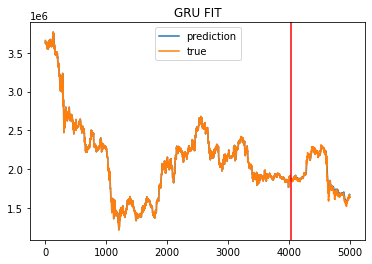

In [ ]:
preds = model.predict(X_test)
preds = scaler.inverse_transform(preds.reshape(-1,1))
preds_series = np.hstack([mydf['open'][:-len(preds)], preds.squeeze(1)])
plt.plot(preds_series, label='prediction')
plt.plot(mydf['open'], label='true')
plt.axvline(x=len(mydf['open'])-len(preds), color='r')
plt.legend()
plt.title('GRU FIT')
plt.show()

In [ ]:
y_true = mydf['open'][-len(preds):]
y_pred = preds.squeeze(1)
print(MAE(y_true, y_pred))
print(MSE(y_true, y_pred))
print(RMSE(y_true, y_pred))

23795.629136504653
1123442626.9988205
33517.79567630933


- LSTM

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=128))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train,y_train,batch_size=30,epochs=20,validation_split=0.2)

Epoch 1/20
104/104 [==============================] - 24s 214ms/step - loss: 0.0089 - val_loss: 1.5629e-04
Epoch 2/20
104/104 [==============================] - 22s 209ms/step - loss: 0.0019 - val_loss: 1.8632e-04
Epoch 3/20
104/104 [==============================] - 25s 237ms/step - loss: 0.0016 - val_loss: 1.4614e-04
Epoch 4/20
104/104 [==============================] - 22s 209ms/step - loss: 0.0014 - val_loss: 3.1770e-04
Epoch 5/20
104/104 [==============================] - 22s 208ms/step - loss: 0.0014 - val_loss: 6.6953e-05
Epoch 6/20
104/104 [==============================] - 22s 207ms/step - loss: 0.0013 - val_loss: 3.8665e-05
Epoch 7/20
104/104 [==============================] - 22s 209ms/step - loss: 0.0011 - val_loss: 8.1479e-05
Epoch 8/20
104/104 [==============================] - 22s 208ms/step - loss: 0.0011 - val_loss: 4.9160e-05
Epoch 9/20
104/104 [==============================] - 22s 208ms/step - loss: 0.0012 - val_loss: 4.6977e-05
Epoch 10/20
104/104 [================

31/31 [==============================] - 3s 76ms/step


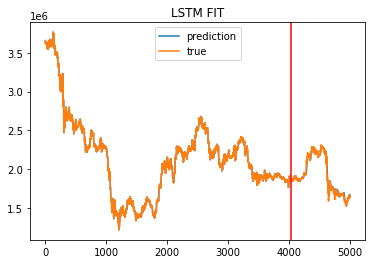

In [ ]:
preds = model.predict(X_test)
preds = scaler.inverse_transform(preds.reshape(-1,1))
preds_series = np.hstack([mydf['open'][:-len(preds)], preds.squeeze(1)])
plt.plot(preds_series, label='prediction')
plt.plot(mydf['open'], label='true')
plt.axvline(x=len(mydf['open'])-len(preds), color='r')
plt.legend()
plt.title('LSTM FIT')
plt.show()

In [ ]:
y_true = mydf['open'][-len(preds):]
y_pred = preds.squeeze(1)
print(MAE(y_true, y_pred))
print(MSE(y_true, y_pred))
print(RMSE(y_true, y_pred))

23464.669984488108
1242787589.8760827
35253.19261962075
